#  E-Commerce Sales Analysis Dashboard

## Project Overview
This analysis explores Amazon e-commerce sales data to identify key drivers of revenue, operational inefficiencies, and opportunities for growth. The notebook demonstrates advanced data cleaning, KPI development, and business insights suitable for management decision-making.

- KPIs: Fulfillment rates, cancellations, returns
-  Revenue & loss analysis
- Category-level performance
-  Customer behavior analysis (proxy)
-  Regional trends & risks

---


#  Executive Summary

 The analysis of Amazon e-commerce sales data reveals strong operational throughput, with approximately **87.8% of orders shipped or delivered**, but only **23.7% confirmed delivered**, suggesting a gap in tracking final fulfillment.

 Gross revenue during the period was approximately **₹78.57M**, of which nearly **₹8.2M (10.4%)** was lost to cancellations and returns. The net realized revenue was **₹70.39M**.

 The *Set*, *Kurta*, and *Western Dress* categories generated over **90% of total revenue**, but also carried high cancellation and return rates, indicating a need for process improvements.

 High-value customer proxies were concentrated in major urban centers like **Noida, Gurugram, Bengaluru, and Hyderabad**, suggesting that loyalty programs and targeted promotions in these areas could improve retention and LTV.

 Certain states (*Meghalaya, Rajasthan, Arunachal Pradesh*) showed extreme cancellation rates (50–100%), while others like *Odisha* and *Mizoram* had higher-than-average return rates, highlighting regional challenges to address.

---

## Recommendations
- Improve delivery tracking to close the gap between shipped and delivered orders.
- Investigate high cancellation and return rates in top revenue categories and regions.
- Develop loyalty programs for high-value customers in key urban centers.
- Reassess operations in states with excessive failure rates or low profitability.
- Explore strategies to diversify revenue beyond top 3 categories.

---


In [28]:
# Install / import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

#  Upload the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Amazon Sale Report.csv")



/tmp/ipython-input-28-1916707050.py:14: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


In [29]:

# 🔍 Initial look
df.head(10)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


In [30]:
# Drop unneeded columns
df.drop(columns=["index", "Unnamed: 22"], inplace=True, errors='ignore')
# Strip spaces from all column names
df.columns = df.columns.str.strip()



In [31]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert ship-postal-code to string
df['ship-postal-code'] = df['ship-postal-code'].astype(str).replace('nan', pd.NA)

/tmp/ipython-input-31-1552848480.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier Status      122103 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  currency            121180 no

In [33]:
#Check null values
df.isnull().sum()


,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [40]:
# Drop rows missing critical info & fill Courier Status
df_clean = df.dropna(subset=['Amount', 'currency'])
df_clean = df_clean.dropna(subset=['ship-city', 'ship-state', 'ship-country'])

df_clean['Courier Status'] = df_clean['Courier Status'].fillna('Unknown')

# Check
df_clean.isnull().sum()


,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [41]:
#Check order status counts
df_clean['Status'].value_counts()

,count
Status,
Shipped,77580
Shipped - Delivered to Buyer,28754
Cancelled,10761
Shipped - Returned to Seller,1947
Shipped - Picked Up,973
Pending,656
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [42]:
# Total number of orders
total_orders = len(df_clean)

#  Status counts
status_counts = df_clean['Status'].value_counts()

#  Key status counts
shipped = status_counts.get('Shipped', 0)
delivered = status_counts.get('Shipped - Delivered to Buyer', 0)
cancelled = status_counts.get('Cancelled', 0)
returned = status_counts.get('Shipped - Returned to Seller', 0)

#  Metrics
shipped_or_delivered = shipped + delivered

shipped_or_delivered_rate = shipped_or_delivered / total_orders
delivered_rate = delivered / total_orders
cancellation_rate = cancelled / total_orders
return_rate = returned / total_orders

#  Display
print(f" Shipped or Delivered (combined): {shipped_or_delivered_rate:.2%}")
print(f" Delivered Only: {delivered_rate:.2%}")
print(f" Cancelled: {cancellation_rate:.2%}")
print(f" Returned: {return_rate:.2%}")


 Shipped or Delivered (combined): 87.77%
 Delivered Only: 23.73%
 Cancelled: 8.88%
 Returned: 1.61%


* Approximately **87.8%** of orders were at least **shipped**, showing good operational throughput.

* However, only **23.7%** were confirmed **delivered**, suggesting a significant portion of orders are **shipped but not tracked** to final delivery.

* **Cancellations** account for **8.9%** of orders, and  **returns** add another **1.6%**, both contributing to revenue loss and potential customer dissatisfaction.

---


**Recommendation**:
Improve order tracking systems and customer communication to ensure shipped orders are confirmed delivered, and implement root cause analysis for cancellations and returns to minimize their impact.

---



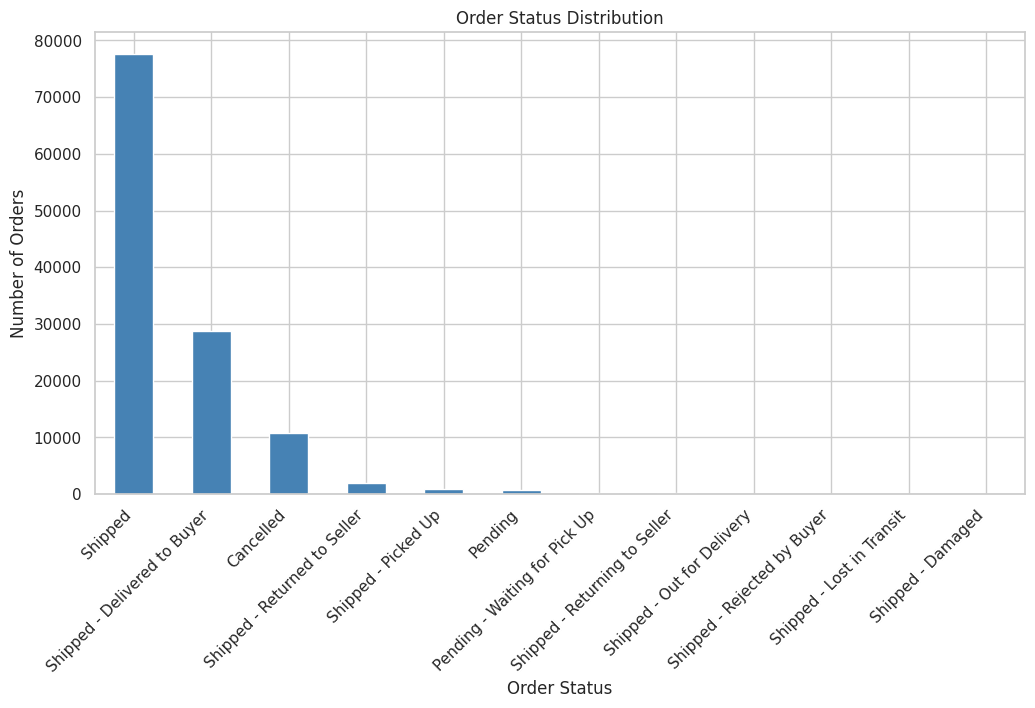

In [43]:
#Visualize order status distribution
import matplotlib.pyplot as plt

status_counts.plot(kind='bar', color='steelblue')
plt.title("Order Status Distribution")
plt.ylabel("Number of Orders")
plt.xlabel("Order Status")
plt.xticks(rotation=45, ha='right')
plt.show()


In [45]:
# Define successful revenue-generating orders
df_approved = df_clean[df_clean['Status'].isin([
    'Shipped',
    'Shipped - Delivered to Buyer'
])]

# Total revenue from approved orders
total_revenue = df_approved['Amount'].sum()

# Revenue by category
category_revenue = (
    df_approved.groupby('Category')['Amount']
    .sum()
)

# Calculate status counts per category
category_status_counts = df_clean.groupby('Category')['Status'].value_counts().unstack(fill_value=0)

# Calculate total orders per category for rate calculations
category_total_orders = category_status_counts.sum(axis=1)

# Calculate Cancellation and Return Rates
category_status_counts['Cancellation Rate (%)'] = (
    category_status_counts['Cancelled'] / category_total_orders * 100
).round(2)
category_status_counts['Return Rate (%)'] = (
    category_status_counts['Shipped - Returned to Seller'] / category_total_orders * 100
).round(2)

# Add Revenue Rate (%) to category_status_counts
category_status_counts['Revenue Rate (%)'] = (category_revenue / total_revenue * 100
).round(2)

# Fill NaNs (categories that had no approved orders) with 0
category_status_counts['Revenue Rate (%)'] = category_status_counts['Revenue Rate (%)'].fillna(0)

# Display table
display(category_status_counts[['Revenue Rate (%)', 'Cancellation Rate (%)', 'Return Rate (%)']].sort_values(
    by='Revenue Rate (%)', ascending=False
))

Status,Revenue Rate (%),Cancellation Rate (%),Return Rate (%)
Category,,,
Set,49.84,8.93,1.62
kurta,27.23,8.97,1.53
Western Dress,14.05,9.08,2.13
Top,6.90,8.16,1.21
Ethnic Dress,1.04,7.32,1.46
Blouse,0.59,8.51,1.36
Bottom,0.19,9.76,1.19
Saree,0.16,7.74,0.65
Dupatta,0.00,0.00,0.00


/tmp/ipython-input-134-3306282333.py:38: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-134-3306282333.py:38: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-134-3306282333.py:38: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) mi

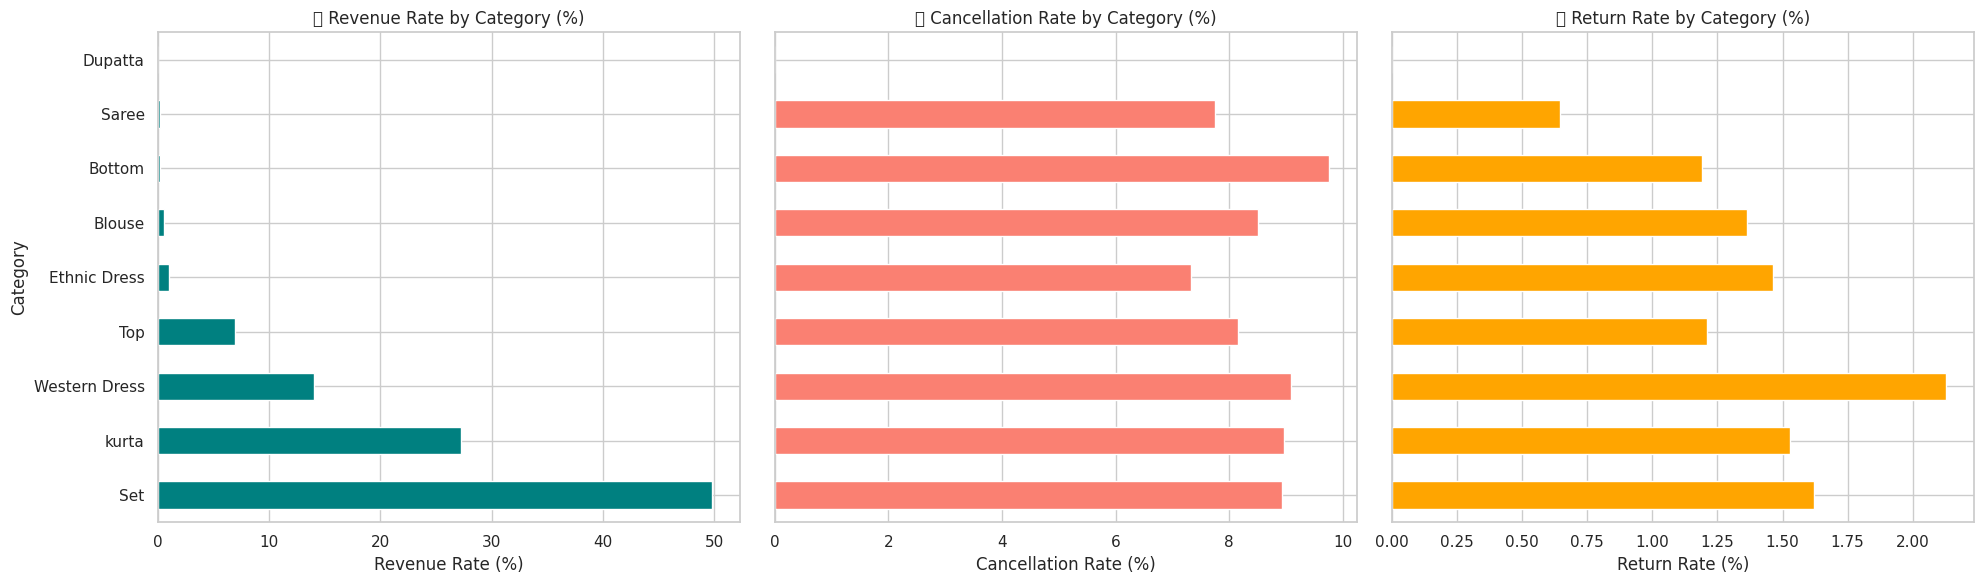

In [134]:
import matplotlib.pyplot as plt

# Sort categories by revenue rate descending
sorted_categories = category_status_counts['Revenue Rate (%)'].sort_values(ascending=False).index

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot Revenue Rate
category_status_counts.loc[sorted_categories, 'Revenue Rate (%)'].plot(
    kind='barh',
    ax=axes[0],
    color='teal'
)
axes[0].set_title(" Revenue Rate by Category (%)")
axes[0].set_xlabel("Revenue Rate (%)")
axes[0].set_ylabel("Category")

# Plot Cancellation Rate
category_status_counts.loc[sorted_categories, 'Cancellation Rate (%)'].plot(
    kind='barh',
    ax=axes[1],
    color='salmon'

axes[1].set_title(" Cancellation Rate by Category (%)")
axes[1].set_xlabel("Cancellation Rate (%)")
axes[1].set_ylabel("")

# Plot Return Rate
category_status_counts.loc[sorted_categories, 'Return Rate (%)'].plot(
    kind='barh',
    ax=axes[2],
    color='orange'
)
axes[2].set_title(" Return Rate by Category (%)")
axes[2].set_xlabel("Return Rate (%)")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


* **Category Revenue Concentration:**
Nearly **50%** of total revenue comes from the **Set** category, followed by **Kurta** **(27%)** and **Western Dress** **(14%)**. This highlights a significant revenue concentration risk: the top three categories together contribute over **90%** of revenue.

* **Cancellation & Return Rates:**
All major categories show similar cancellation rates around **8–9%**, with **Western Dress** slightly higher at **9.08%**. Return rates remain relatively low overall, highest in Western Dress at **2.13%**.

---


**Recommendations:**
Diversify product portfolio to reduce reliance on the **Set** category.
Investigate why **Western Dress** has the highest return rate, potentially due to sizing or quality issues.
Monitor the smaller categories (Blouse, Bottom, Saree, Dupatta) for potential growth opportunities if their return & cancel rates remain lower than average.

---



/tmp/ipython-input-46-3215644526.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.set_index('Date').resample('M')['Amount'].sum().plot(kind='line', marker='o')


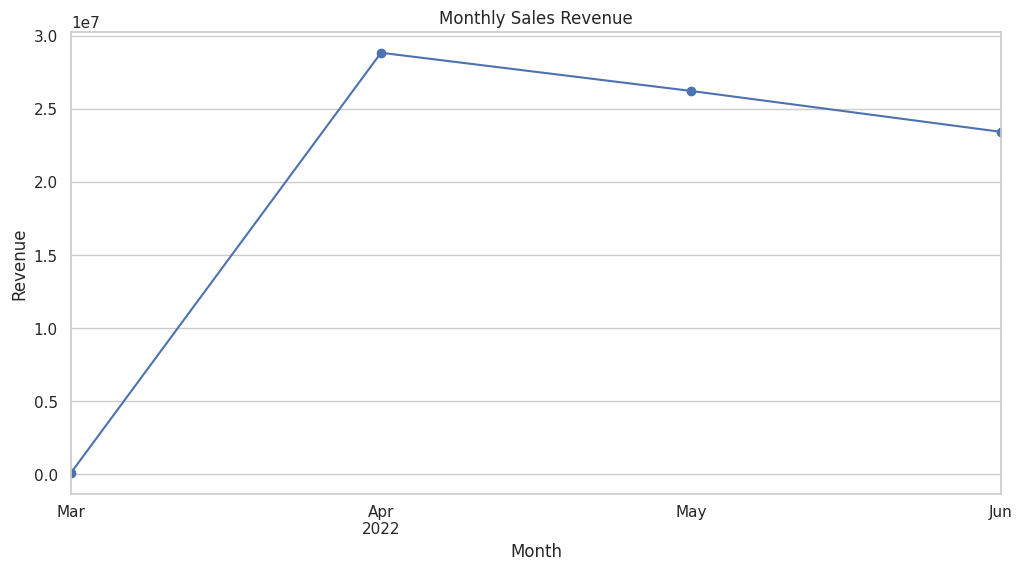

In [46]:
df_clean.set_index('Date').resample('M')['Amount'].sum().plot(kind='line', marker='o')
plt.title("Monthly Sales Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


**Revenue Growth & Slowdown:**
Sales revenue showed a strong growth trajectory from March to April 2022, **peaking** at nearly **₹29 million** in April. However, this was followed by a gradual decline through May and June, with revenue **dropping** to around **₹25 million** by June.

---


**Recommendation:**
Investigate what drove the April peak (e.g., seasonal promotions, campaigns, or festivals) and whether similar initiatives can be replicated. Analyze the causes of the subsequent slowdown (e.g., inventory shortages, reduced marketing, external market conditions) and implement corrective actions to sustain momentum.

---



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


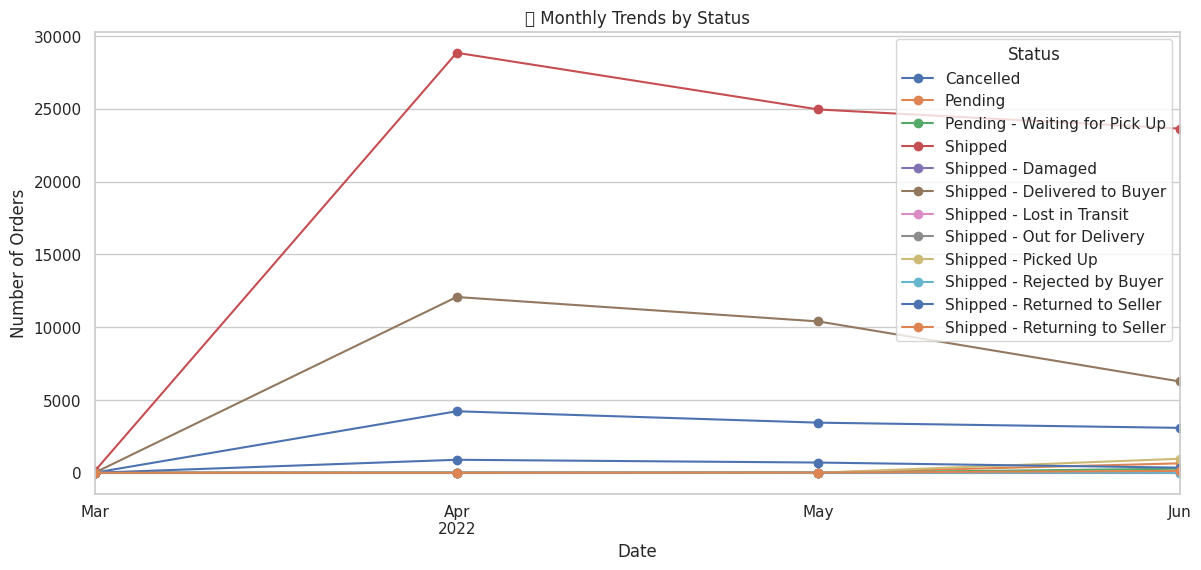

In [47]:
monthly_trends = (
    df_clean.groupby([df['Date'].dt.to_period('M'), 'Status'])
    .size().unstack(fill_value=0)
)
monthly_trends.index = monthly_trends.index.to_timestamp()

monthly_trends.plot(figsize=(14,6), marker='o', title="📅 Monthly Trends by Status")
plt.ylabel("Number of Orders")
plt.show()


* **Shipping Dominates, but Delivery Confirmation Lags:**
Orders marked as Shipped peaked in April and then declined slightly, mirroring overall revenue trends. However, the number of orders confirmed as Delivered to Buyer is consistently much lower than shipped orders, suggesting a potential gap in delivery tracking or customer acknowledgment.

* **Cancelled & Returned Orders:**
Cancellations and returns also peaked in April, aligned with the surge in overall order volume, and have decreased since then but remain non-trivial.

---


**Recommendations:**
Investigate operational bottlenecks preventing timely

*   Investigate operational bottlenecks preventing timely confirmation of deliveries despite high shipping volumes.
*   Review April’s peak for insights into what drove demand and how to sustain it.
*   
Develop targeted process improvements for reducing cancellations & returns, especially during high-volume months.

---



In [48]:
# Total gross revenue (all orders)
gross_revenue = df_clean['Amount'].sum()

# Revenue lost to cancellations
cancelled_revenue = df_clean.loc[df_clean['Status'] == 'Cancelled', 'Amount'].sum()

# Revenue lost to returns
returned_revenue = df_clean.loc[df_clean['Status'] == 'Shipped - Returned to Seller', 'Amount'].sum()

# Net actual revenue (delivered + shipped)
net_revenue = gross_revenue - cancelled_revenue - returned_revenue

# Print results
print(f" Gross Revenue: ₹{gross_revenue:,.2f}")
print(f" Lost to Cancellations: ₹{cancelled_revenue:,.2f}")
print(f" Lost to Returns: ₹{returned_revenue:,.2f}")
print(f" Net Realized Revenue: ₹{net_revenue:,.2f}")


 Gross Revenue: ₹78,574,007.30
 Lost to Cancellations: ₹6,917,254.30
 Lost to Returns: ₹1,268,015.00
 Net Realized Revenue: ₹70,388,738.00


* **Gross vs. Net Revenue:**
The business generated a total gross revenue of **₹78.57M** during the period. However, approximately **₹6.92M (8.8%)** was lost due to cancellations and an additional **₹1.27M (1.6%)** due to returns. This brings the net realized revenue down to **₹70.39M**, or about **89.6%** of gross revenue.

* **Revenue Leakage:**
Together, cancellations and returns account for nearly **10.4%** of potential revenue, indicating an area of operational inefficiency.

---


**Recommendations:**
* Perform root cause analysis on cancelled and returned orders to identify patterns (e.g., specific products, fulfillment issues, or customer segments).
* Implement better inventory & order confirmation practices to reduce cancellations.
* Enhance product descriptions, sizing guides, and quality checks to minimize returns.

---



In [49]:
geo_cancelled = df_clean[df_clean['Status'] == 'Cancelled'].groupby('ship-state').size()
geo_returns = df_clean[df_clean['Status'] == 'Shipped - Returned to Seller'].groupby('ship-state').size()
geo_orders = df_clean.groupby('ship-state').size()

geo_metrics = pd.DataFrame({
    'Cancellation Rate (%)': (geo_cancelled / geo_orders * 100).fillna(0),
    'Return Rate (%)': (geo_returns / geo_orders * 100).fillna(0)
}).sort_values(by='Cancellation Rate (%)', ascending=False)

geo_metrics.head(10)


,Cancellation Rate (%),Return Rate (%)
ship-state,,
Meghalaya,100.000000,0.000000
Rajshthan,50.000000,0.000000
Arunachal Pradesh,33.333333,0.000000
LAKSHADWEEP,25.000000,0.000000
Odisha,20.000000,5.000000
MIZORAM,15.277778,4.166667
ANDAMAN & NICOBAR,12.757202,2.880658
KERALA,12.095594,1.268086
LADAKH,11.904762,4.761905


* **High-Risk States Identified:**
Several states show disproportionately high cancellation rates, led by **Meghalaya** at **100%**, **Rajasthan** at **50%**, and **Arunachal Pradesh** at **33.3%**. While the absolute order volumes from these states may be low, such extreme failure rates signal issues worth investigating.

* **Elevated Return Rates:**
States such as **Ladakh** **(4.8%)**, **Mizoram** **(4.2%)**, and **Odisha** **(5%)** have higher-than-average return rates, indicating possible product mismatch, delivery challenges, or customer dissatisfaction in these regions.

---


**Recommendations:**

Analyze order volumes and operational challenges in high-cancellation states like **Meghalaya** and **Rajasthan**; consider whether to continue or pause service until issues are resolved.
Improve customer education (e.g., sizing, delivery timelines) and enhance delivery partner reliability in states with high return rates.
Re-assess regional pricing, promotions, and delivery SLAs to better align with customer expectations in underperforming areas.

---



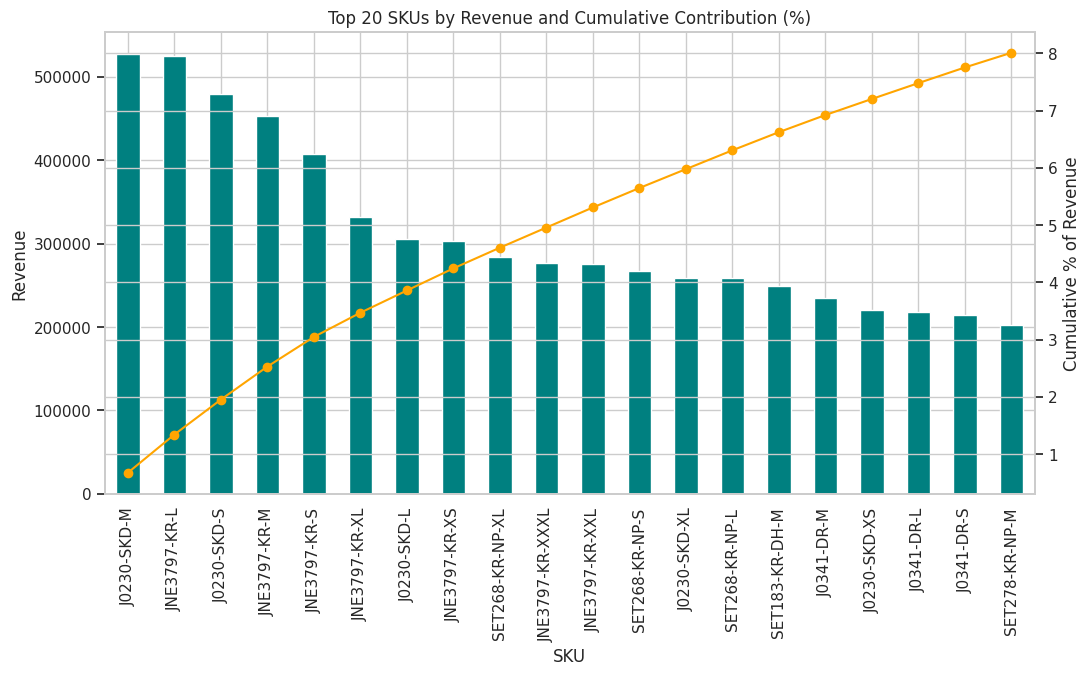

In [50]:
# Revenue by SKU
sku_revenue = (
    df_clean.groupby('SKU')['Amount']
    .sum()
    .sort_values(ascending=False)
)

sku_cum_pct = sku_revenue.cumsum() / sku_revenue.sum() * 100

# Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(12,6))

sku_revenue.head(20).plot(kind='bar', ax=ax1, color='teal')
ax1.set_ylabel("Revenue")
ax1.set_title("Top 20 SKUs by Revenue and Cumulative Contribution (%)")

ax2 = ax1.twinx()
sku_cum_pct.head(20).plot(ax=ax2, color='orange', marker='o')
ax2.set_ylabel("Cumulative % of Revenue")

plt.show()


* **Revenue Concentration Among SKUs:**
The top 20 SKUs each contribute significant revenue, with the highest-selling SKU generating over **₹500K.** The cumulative contribution line shows that even these top 20 SKUs collectively account for only about 8% of total revenue, suggesting a highly distributed revenue base across a broad product catalog.

* **Implications:**
While no single SKU dominates revenue excessively (which is good for risk distribution), it also suggests that individual SKUs have relatively low impact, and scaling high-performers may offer incremental gains.

---


**Recommendations:**

Focus marketing and inventory on the top 5–10 SKUs to maximize their potential and increase their contribution to overall revenue.
Analyze profitability per SKU — high revenue does not always equal high margin.
Evaluate whether some low-revenue SKUs can be discontinued to optimize inventory costs.

---



In [55]:
# Create a synthetic Customer Proxy identifier
# Combines ship-postal-code and ship-city into a single string
# to approximate a unique customer when Customer ID is not available
df_clean['Customer_Proxy'] = (
    df_clean['ship-postal-code'].fillna('').astype(str).str.strip() + '_' +
    df_clean['ship-city'].fillna('').astype(str).str.strip()
)

In [56]:
#Find the unique (proxy) number of customers
n_customers = df_clean['Customer_Proxy'].nunique()
print(f" Unique Customers: {n_customers}")

 Unique Customers: 17547


In [57]:
#  Calculate Repeat Customer Proxy Rate
# Group orders by Customer_Proxy and count unique Order IDs per proxy
customer_orders = df_clean.groupby('Customer_Proxy')['Order ID'].nunique()

# Count how many Customer_Proxies placed more than one order
repeat_customers = (customer_orders > 1).sum()

# Calculate repeat customer rate as a percentage of total unique customers
repeat_rate = repeat_customers / n_customers * 100

# Display the repeat customer proxy rate
print(f" Repeat Customer Proxy Rate: {repeat_rate:.2f}%")


 Repeat Customer Proxy Rate: 51.87%


In [58]:
#  Generate Top 10 Customer Proxies by Lifetime Value
# Group data by Customer_Proxy and aggregate:
# - total_spent: total revenue generated by each proxy
# - order_count: number of unique orders placed
# - avg_order_value: average value per order
customer_summary = df_clean.groupby('Customer_Proxy').agg(
    total_spent=('Amount', 'sum'),
    order_count=('Order ID', 'nunique'),
    avg_order_value=('Amount', 'mean')
).sort_values('total_spent', ascending=False).head(10)

# Display the top 10 customer proxies by total_spent
customer_summary

,total_spent,order_count,avg_order_value
Customer_Proxy,,,
201301.0_NOIDA,534179.72,722,683.968912
122001.0_GURUGRAM,359885.66,488,696.103791
560068.0_BENGALURU,332686.81,475,661.405189
560037.0_BENGALURU,318948.44,468,630.332885
560076.0_BENGALURU,287877.61,407,655.757654
560100.0_BENGALURU,266988.05,388,648.029248
560043.0_BENGALURU,257701.06,383,641.047413
560066.0_BENGALURU,246694.63,359,656.102739
401107.0_THANE,242299.45,361,641.003836


* **High-Value Customers Concentrated in Key Cities:**
The top customer proxies contributed significantly to total revenue, with the highest, **201301.0_NOIDA**, spending over **₹534K across 722 orders** with an average order value of **~₹684.** The majority of top spenders are concentrated in major urban centers such as **Bengaluru**, **Gurugram**, **Hyderabad**, and **Thane**.

* **Average Order Values Consistent:**
The average order value for these top customers is relatively consistent, ranging from **₹630 to ₹696**, suggesting uniform purchasing behavior among the high-value segment.

---


**Recommendations:**
* Design loyalty or VIP programs targeting these high-value customers to encourage repeat business and increase lifetime value.
* Focus targeted promotions and personalized campaigns in Bengaluru, Noida, Gurugram, Hyderabad, and Thane, where customer spending power is clearly strong.
* Consider collecting more granular customer data (e.g., email, phone) to replace proxies and enable true customer relationship management (CRM) initiatives.

---



## Conclusion
This analysis of Amazon e-commerce sales data uncovered actionable insights into revenue performance, operational inefficiencies, and customer behavior.

*  The business demonstrated strong gross sales and healthy shipping throughput, but a significant portion of revenue was lost to cancellations and untracked deliveries.
*  Revenue remains heavily concentrated in a few product categories and urban regions, leaving the company exposed to risks if these segments underperform.
*  Certain regions and product lines exhibit disproportionately high cancellation and return rates, pointing to potential process, quality, or fulfillment challenges.
* High-value customers were identified, and their consistent purchasing patterns highlight an opportunity to improve customer retention through targeted loyalty initiatives.

---

